# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('creditcard.csv')

# 1. Display Top 5 Rows

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Find Shape of the Dataset

In [4]:
df.shape

(284807, 31)

In [5]:
print('Number of rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  284807
Number of columns:  31


# 3. Get Information about the Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 4. Check Null Values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# 5. Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [11]:
df = df.drop(['Time'],axis=1)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
df.shape

(284807, 30)

In [14]:
df.duplicated().any()

True

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(275663, 30)

# 6. Not Handling Imbalance

In [17]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

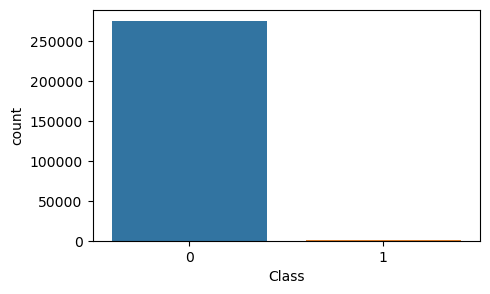

In [18]:
plt.figure(figsize=(5,3))
sns.countplot(df['Class'])

# 7. Store Feature Matrix X and Target y

In [19]:
X = df.drop('Class',axis=1)
y = df['Class']

# 8. Split Dataset (Train & Test)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# 9. Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred1 = log.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
accuracy_score(y_test,y_pred1)

0.9992200678359603

In [26]:
precision_score(y_test,y_pred1)

0.8870967741935484

In [27]:
recall_score(y_test,y_pred1)

0.6043956043956044

In [28]:
f1_score(y_test,y_pred1)

0.718954248366013

# we could see that the precision, recall, and f1 score low because of the imbalanced data

# Under Sampling

In [29]:
non = df[df['Class']==0]
fraud = df[df['Class']==1]

In [30]:
non.shape

(275190, 30)

In [31]:
fraud.shape

(473, 30)

In [32]:
non_under = non.sample(n=473)

In [33]:
df_under = pd.concat([non_under,fraud], ignore_index=True)

In [34]:
df_under['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [35]:
df_under.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.447016,0.865305,1.317656,-0.031990,-0.049573,-0.348205,0.401046,0.327438,-0.328063,-0.324674,1.499791,-0.457918,-2.311744,0.263817,0.681796,0.335738,0.240390,0.124146,-0.222342,-0.051299,-0.195072,-0.612429,0.064959,0.109621,-0.366456,0.079036,0.242154,0.082075,-0.321205,0
1,2.082009,-1.586110,0.167297,-0.678553,-1.812335,0.404330,-1.970954,0.514483,1.290749,0.764777,-0.487516,-1.323682,-3.222681,-0.380038,-1.300885,1.301652,0.354379,-0.366670,1.196143,-0.264987,0.128715,0.509215,0.225456,-0.521976,-0.445994,-0.167653,0.040025,-0.059417,-0.345233,0
2,1.548510,-1.058162,0.384006,-1.718831,-1.114312,0.205602,-1.310541,0.016813,-1.945282,1.567125,0.332338,-0.003773,1.832491,-0.596662,0.100010,0.332994,-0.365496,1.043174,0.281482,-0.209258,-0.075670,0.234233,-0.166442,-0.815275,0.505906,-0.051424,0.054955,0.006748,-0.324843,0
3,1.239188,0.216552,0.104436,0.569486,-0.110292,-0.424420,-0.076976,0.022678,0.225817,-0.292474,-0.360802,-0.403783,-0.868843,-0.054495,1.496930,0.344294,0.207271,-0.491271,-0.413214,-0.175374,-0.297205,-0.874565,0.128745,-0.357572,0.153087,0.150326,-0.014349,0.021180,-0.349271,0
4,-0.478123,1.400613,2.739182,4.483534,0.444677,1.461042,-0.179225,0.283937,-0.799718,0.972051,1.269634,-2.197735,2.786862,1.235351,-0.710844,0.268869,0.460369,1.291623,1.311427,0.300282,0.091144,0.622274,-0.427799,-0.353499,0.212275,0.559436,0.100140,0.081805,-0.349231,0


# Store X and y

In [36]:
X = df_under.drop('Class',axis=1)
y = df_under['Class']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# 9. Logistic Regression (Undersampling)

In [38]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred1 = log.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred1)

0.9315789473684211

In [41]:
precision_score(y_test,y_pred1)

0.9587628865979382

In [42]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [43]:
f1_score(y_test,y_pred1)

0.9346733668341709

# 10. Decision Tree Classifier (Undersampling)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred2 = dtc.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred2)

0.9105263157894737

In [47]:
precision_score(y_test,y_pred2)

0.9292929292929293

In [48]:
recall_score(y_test,y_pred2)

0.9019607843137255

In [49]:
f1_score(y_test,y_pred2)

0.9154228855721392

# 11. Random Forest Classifier (Undersampling)

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_pred3 = rfc.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.9263157894736842

In [53]:
precision_score(y_test,y_pred3)

0.9680851063829787

In [54]:
recall_score(y_test,y_pred3)

0.8921568627450981

In [55]:
f1_score(y_test,y_pred3)

0.9285714285714286

# 12. Visualize

In [56]:
acc_score = pd.DataFrame({'Models':['LR','DT','RF'],
              'ACC' :[accuracy_score(y_test,y_pred1)*100,
                      accuracy_score(y_test,y_pred2)*100,
                      accuracy_score(y_test,y_pred3)*100
                     ]})

In [57]:
acc_score

,Models,ACC
0,LR,93.157895
1,DT,91.052632
2,RF,92.631579


<AxesSubplot:xlabel='Models', ylabel='ACC'>

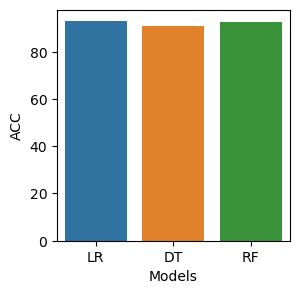

In [58]:
plt.figure(figsize=(3,3))
sns.barplot(acc_score['Models'],acc_score['ACC'])

# Oversampling

In [59]:
X = df.drop('Class',axis =1)
y = df['Class']

In [60]:
X.shape

(275663, 29)

In [61]:
y.value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [64]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# 13. Logistic Regression (Oversampling)

In [66]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred1 = log.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred1)

0.9448108579526873

In [69]:
precision_score(y_test,y_pred1)

0.9730450924278753

In [70]:
recall_score(y_test,y_pred1)

0.9148955511517554

In [71]:
f1_score(y_test,y_pred1)

0.9430748039243246

# 14. Decision Tree Classifier

In [72]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
y_pred2 = dtc.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred2)

0.9981013118209238

In [75]:
precision_score(y_test,y_pred2)

0.9971510488495319

In [76]:
recall_score(y_test,y_pred2)

0.9990545970219806

In [77]:
f1_score(y_test,y_pred2)

0.998101915339975

# 15. Random Forest Classifier

In [78]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred3 = rfc.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred3)

0.999918238308078

In [81]:
precision_score(y_test,y_pred3)

0.9998363993310551

In [82]:
recall_score(y_test,y_pred3)

1.0

In [83]:
f1_score(y_test,y_pred3)

0.9999181929736854

# Visualize

In [84]:
acc_score = pd.DataFrame({'Models':['LR','DT','RF'],
              'ACC' :[accuracy_score(y_test,y_pred1)*100,
                      accuracy_score(y_test,y_pred2)*100,
                      accuracy_score(y_test,y_pred3)*100
                     ]})

In [85]:
acc_score

,Models,ACC
0,LR,94.481086
1,DT,99.810131
2,RF,99.991824


<AxesSubplot:xlabel='Models', ylabel='ACC'>

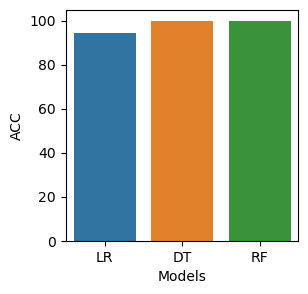

In [86]:
plt.figure(figsize=(3,3))
sns.barplot(acc_score['Models'],acc_score['ACC'])

# Save the Best Model (Random Forest Classifier)

In [87]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_res,y_res)

RandomForestClassifier()

In [88]:
import joblib

In [89]:
joblib.dump(rfc1,'cc_fraud_detection')

['cc_fraud_detection']

In [90]:
model = joblib.load('cc_fraud_detection')

In [91]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [92]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


# GUI

In [96]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())

    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())

    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())


    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())


    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())


    model = joblib.load('cc_fraud_detection')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,
                                v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29]

    result = []
    if y_pred ==0:

        result.append("Normal Transcation")
    else:

        result.append("Fraudulent Transcation")
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")



    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=31)
    Label(master, text=result).grid(row=32)



master = Tk()
master.title("Credit Card Fraud Detection System")


label = Label(master, text = "Credit Card Fraud Detection System"
                          , bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of V1").grid(row=1)
Label(master, text="Enter value of V2").grid(row=2)
Label(master, text="Enter value of V3").grid(row=3)
Label(master, text="Enter value of V4").grid(row=4)
Label(master, text="Enter value of V5").grid(row=5)
Label(master, text="Enter value of V6").grid(row=6)

Label(master, text="Enter value of V7").grid(row=7)
Label(master, text="Enter value of V8").grid(row=8)
Label(master, text="Enter value of V9").grid(row=9)
Label(master, text="Enter value of V10").grid(row=10)
Label(master, text="Enter value of V11").grid(row=11)
Label(master, text="Enter value of V12").grid(row=12)

Label(master, text="Enter value of V13").grid(row=13)
Label(master, text="Enter value of V14").grid(row=14)
Label(master, text="Enter value of V15").grid(row=15)
Label(master, text="Enter value of V16").grid(row=16)
Label(master, text="Enter value of V17").grid(row=17)
Label(master, text="Enter value of V18").grid(row=18)

Label(master, text="Enter value of V19").grid(row=19)
Label(master, text="Enter value of V20").grid(row=20)
Label(master, text="Enter value of V21").grid(row=21)
Label(master, text="Enter value of V22").grid(row=22)
Label(master, text="Enter value of V23").grid(row=23)
Label(master, text="Enter value of V24").grid(row=24)

Label(master, text="Enter value of V25").grid(row=25)
Label(master, text="Enter value of V26").grid(row=26)
Label(master, text="Enter value of V27").grid(row=27)
Label(master, text="Enter value of V28").grid(row=28)
Label(master, text="Enter value of V29").grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18= Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23= Entry(master)
e24 = Entry(master)


e25 = Entry(master)
e26= Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29= Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)


e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)
e16.grid(row=16, column=1)
e17.grid(row=17, column=1)
e18.grid(row=18, column=1)


e19.grid(row=19, column=1)
e20.grid(row=20, column=1)
e21.grid(row=21, column=1)
e22.grid(row=22, column=1)
e23.grid(row=23, column=1)
e24.grid(row=24, column=1)

e25.grid(row=25, column=1)
e26.grid(row=26, column=1)
e27.grid(row=27, column=1)
e28.grid(row=28, column=1)
e29.grid(row=29, column=1)
 
Button(master, text='Predict', command=show_entry_fields).grid(row=30, column=1, sticky=W, pady=4)

mainloop( )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


######################################
Credit Card Fraud Detection System ['Normal Transcation']
######################################
